<a href="https://colab.research.google.com/github/Willians-Luis/titanic-trabalho/blob/main/Titanic_Trabalho_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score

#<br>**Tratando os dados**

In [35]:
train_original = pd.read_csv('train.csv')
test_original = pd.read_csv('test.csv')
train = train_original
test = test_original

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [38]:
#Exibindo a porcentagem de dados nulos do train
train.isnull().sum() / len(train) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [39]:
#Exibindo a porcentagem de dados nulos do test
test.isnull().sum() / len(test) * 100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [40]:
#removendo colunas menos relevantes e com muitos dados nulos
train = train.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test = test.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [41]:
#Substituindo idades nulas pela media de idades
train['Age'].fillna((train['Age'].mean()), inplace=True)
test['Age'].fillna((test['Age'].mean()), inplace=True)

In [42]:
#train - substituindo embarked nulos pela moda
train.loc[train.Embarked.isnull(), 'Embarked'] = train.Embarked.mode()[0]

In [43]:
#test - substituindo Fare nulos pela media
test.loc[test.Fare.isnull(), 'Fare'] = test.Fare.mean()

In [44]:
#Substituindo Sex de objeto para binario
train['Sex'].replace('male', 1, inplace=True)
train['Sex'].replace('female', 0, inplace=True)
test['Sex'].replace('male', 1, inplace=True)
test['Sex'].replace('female', 0, inplace=True)

In [45]:
#Exibindo a porcentagem de dados nulos do train
train.isnull().sum() / len(train) * 100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [46]:
#Exibindo a porcentagem de dados nulos do test
test.isnull().sum() / len(test) * 100

PassengerId    0.0
Pclass         0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [47]:
#criando um array train apenas com as colunas com dados numericos
array_treino_numerico = train.columns[train.dtypes != 'object']

#transformando o array em dataframe
treino_numerico = train.loc[:,array_treino_numerico]

In [48]:
#criando um array test apenas com as colunas com dados numericos
array_teste_numerico = test.columns[test.dtypes != 'object']

#transformando o array em dataframe
teste_numerico = test.loc[:,array_teste_numerico]

#<br><br>**Análise Exploratória e Visualização de Dados:**

In [49]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
#porcentagem de pessoas na primeira classe
train.loc[train['Pclass'] == 1, 'Pclass'].count() / len(train['Pclass'].index) * 100

24.242424242424242

In [51]:
#porcentagem de pessoas na segunda classe
train.loc[train['Pclass'] == 2, 'Pclass'].count() / len(train['Pclass'].index) * 100

20.65095398428732

In [52]:
#porcentagem de pessoas na terceira classe
train.loc[train['Pclass'] == 3, 'Pclass'].count() / len(train['Pclass'].index) * 100

55.106621773288445

<br>**Idade:** min= 0.42, max= 80, media= 29.69 <br>
**Porcentagem de pessoas por sexo:** masculino= 64.75%, feminino= 36.24% <br>
**Porcentagem de pessoas por classe:** primeira= 24%, segunda= 20%, terceira= 55% <br>
**Taxa de sobrevivencia:** sobreviventes= 38%, não sobreviventes= 62%

In [53]:
sobreviventes = train.loc[train['Survived']  == 1]

In [54]:
# sexo que mais aparece entre os sobreviventes
sobreviventes['Sex'].mode()

0    0
Name: Sex, dtype: int64

In [55]:
# Porcentagem de sobreviventes mulheres
len(sobreviventes.loc[sobreviventes['Sex'] == 0]) / len(sobreviventes)

0.6812865497076024

In [56]:
# Porcentagem de sobreviventes mulheres
len(sobreviventes.loc[sobreviventes['Sex'] == 1]) / len(sobreviventes)

0.31871345029239767

<br>**Conclusão:** Entre os sobreviventes do dataFrame de train o sexo que mais aparece é o feminino 68% contra 32% masculino

Text(0.5, 1.0, 'Idade x Preço do Ticket x Sobrevivente')

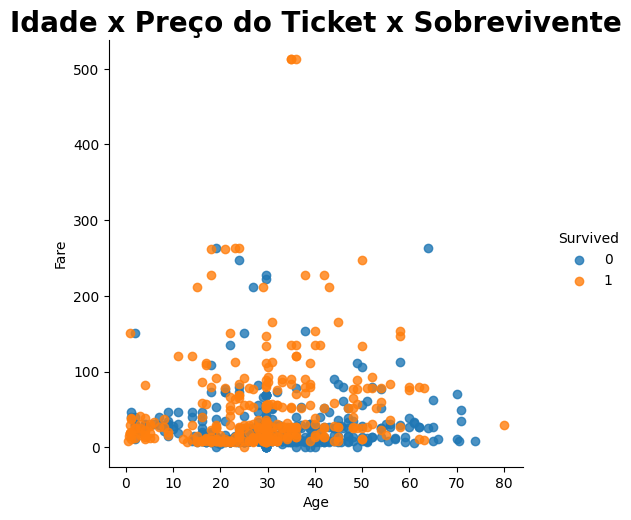

In [57]:
#disperção dos sobreviventes entre Age e Fare
sns.lmplot(x='Age', y='Fare', hue='Survived', data=train, fit_reg=False)
plt.title('Idade x Preço do Ticket x Sobrevivente', fontsize=20, fontweight='bold')

<br>**Conclusão:** Nesse caso é possível notar que a maioria dos passageiros sobreviventes são mais jovens e que compraram o ticket mais barato<br><br>

Text(0.5, 1.0, 'Sobreviventes por sexo')

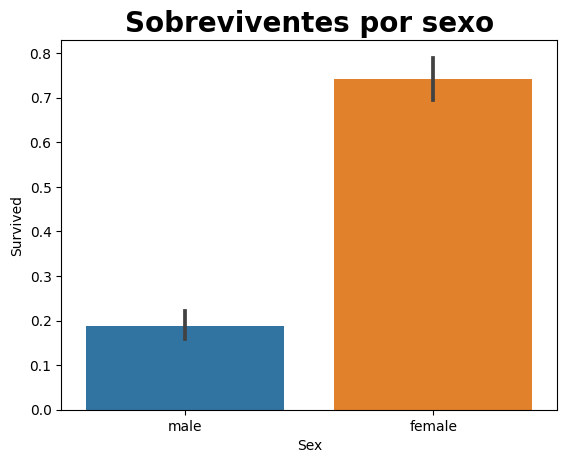

In [62]:
sns.barplot(x='Sex', y= 'Survived', data=train_original)
plt.title('Sobreviventes por sexo', fontsize=20, fontweight='bold')

<br>**Conclusão:** Pelo gráfico de barras é possível ver que a quantidade de mulheres sobreviventes é bem maior que a dos homens.<br><br>

Text(0.5, 1.0, 'Sobreviventes por sexo x classe social')

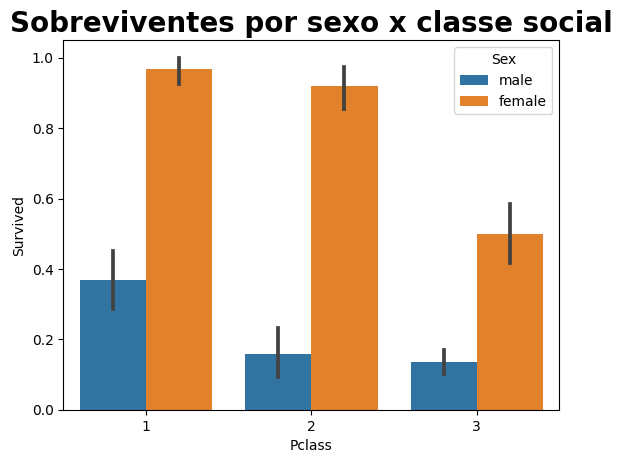

In [61]:
sns.barplot(data=train_original, x='Pclass', y= 'Survived', hue='Sex')
plt.title('Sobreviventes por sexo x classe social', fontsize=20, fontweight='bold')

<br>**Conclusão:** Em todas as classes a quantidade de  mulheres sobreviventes é bem maior que a dos homens, a primeira classe mesmo tendo menos passageiros que as outras é a que teve mais sobreviventes

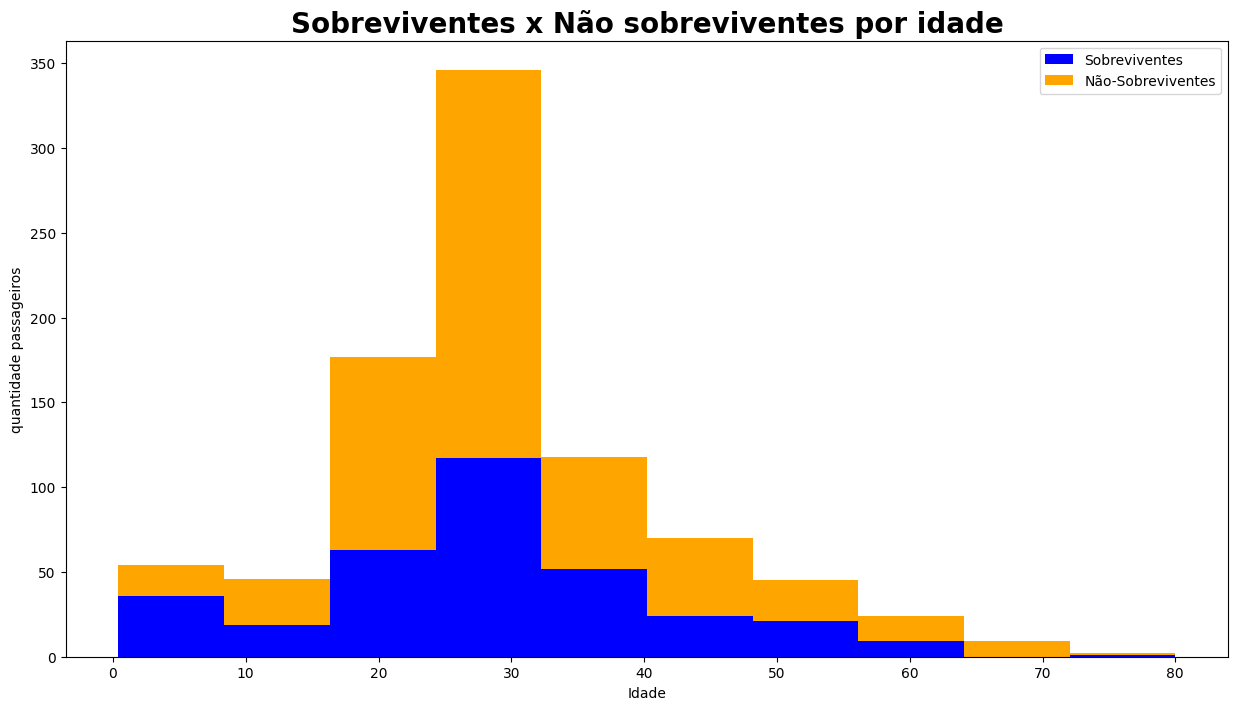

In [60]:
figure = plt.figure(figsize=(15,8))
plt.hist([treino_numerico[treino_numerico['Survived']==1]['Age'], treino_numerico[treino_numerico['Survived']==0]['Age']],
         stacked=True, color=['blue', 'orange'],
         bins=10, label=['Sobreviventes','Não-Sobreviventes'])
plt.xlabel('Idade')
plt.ylabel('quantidade passageiros')
plt.title('Sobreviventes x Não sobreviventes por idade', fontsize=20, fontweight='bold')
plt.legend()


**Conclusão:** Baseado nos gráficos é possível notar que abaixo dos 30 anos é onde aparece a maior quantidade de sobreviventes.

<br> **Taxa de sobrevivência**

**Sexo**

In [63]:
#taxa de sobrevivência de mulheres
ts_mulher = train.loc[train['Sex'] == 0]
ts_mulher = ts_mulher.loc[ts_mulher['Survived'] == 1]
len(ts_mulher.index) / len(train.loc[train['Sex'] == 0].index) * 100

74.20382165605095

In [64]:
#taxa de sobrevivência de homens
ts_homens = train.loc[train['Sex'] == 1]
ts_homens = ts_homens.loc[ts_homens['Survived'] == 1]
len(ts_homens.index) * 100 / len(train.loc[train['Sex'] == 1].index)

18.890814558058924

<br>**Classe**

In [65]:
#taxa de sobrevivência de pessoas da primeira classe
pessoas1 = train.loc[train['Pclass'] == 1]
pessoas1Sobreviventes = pessoas1.loc[pessoas1['Survived'] == 1]
len(pessoas1Sobreviventes.index) * 100 / len(pessoas1.index)


62.96296296296296

In [66]:
#taxa de sobrevivência de pessoas da segunda classe
pessoas2 = train.loc[train['Pclass'] == 2]
pessoas2Sobreviventes = pessoas2.loc[pessoas2['Survived'] == 1]
len(pessoas2Sobreviventes.index) * 100 / len(pessoas2.index)

47.28260869565217

In [67]:
#taxa de sobrevivência de pessoas da terceira classe^
pessoas3 = train.loc[train['Pclass'] == 3]
pessoas3Sobreviventes = pessoas3.loc[pessoas3['Survived'] == 1]
len(pessoas3Sobreviventes.index) * 100 / len(pessoas3.index)

24.236252545824847

<br>**Idade**

In [68]:
#taxa de sobrevivência de crianças e adolecentes
criancas = train.loc[train['Age'] < 18]
criancasSobreviventes = criancas.loc[criancas['Survived'] == 1]
len(criancasSobreviventes.index) * 100 / len(criancas.index)

53.982300884955755

In [69]:
#taxa de sobrevivência de adultos
adultos = train.loc[train['Age'] < 60]
adultos = adultos.loc[adultos['Age'] >= 18]
adultosSobreviventes = adultos.loc[adultos['Survived'] == 1]
len(adultosSobreviventes.index) * 100 / len(adultos.index)

36.43617021276596

In [70]:
#taxa de sobrevivência de idosos
idosos = train.loc[train['Age'] >= 60]
idososSobreviventes = idosos.loc[idosos['Survived'] == 1]
len(idososSobreviventes.index) * 100 / len(idosos.index)

26.923076923076923

<br>**Taxa de sobrevivência:**<br>
**Mulheres:** 74.20%<br>
**Homens:** 18.89%<br>
**primeira classe:** 62.96%<br>
**segunda classe:** 47.28%<br>
**terceira classe:** 24.23%<br>
**crianças e adolecentes:** 53.98%<br>
**adultos:** 36.43%<br>
**idosos:** 26.92%<br>

#<br><br>**Medidas de Tendência Central e Medidas de Dispersão:**

#<br>1. Calcule a média de idades dos passageiros e identifique possíveis diferenças entre os grupos de sobreviventes e não sobreviventes.

In [72]:
#média de idade
train_original['Age'].mean()

29.69911764705882

In [73]:
#média de idade dos sobreviventes
sobreviventes = train_original.loc[train_original['Survived'] == 1]
sobreviventes['Age'].mean()

28.343689655172415

In [74]:
#média de idade dos não sobreviventes
naoSobreviventes = train_original.loc[train_original['Survived'] == 0]
naoSobreviventes['Age'].mean()

30.62617924528302

<br>A média de idade entre os passageiros é de 29.69.<br>
A média de idade dos sobreviventes é de 28.34<br>
A média de idade dos não sobreviventes é de 30.62.<br>
Isso significa que pessoas mais jovens tiveram mais chances de sobrevivência

#<br>2. Determine a variação da tarifa paga pelos passageiros e compare-a entre grupos.

In [75]:
# Variancia e Desvio Padrão do valor dos tickets
fareVariancia = np.var(train['Fare'])
fareDesvio = np.std(train['Fare'])
print('Variancia: ', fareVariancia,', Desvio Padrão: ', fareDesvio)

Variancia:  2466.665311685043 , Desvio Padrão:  49.6655344447741


In [76]:
# Variancia e Desvio Padrão do valor dos tickets da primeira classe
classe1 = train.loc[train['Pclass'] == 1]
classe1Var = np.var(classe1['Fare'])
classe1std = np.std(classe1['Fare'])
print('Variancia: ', classe1Var, ', Desvio Padrão: ', classe1std)

Variancia:  6115.040766164889 , Desvio Padrão:  78.19872611599814


In [77]:
# Variancia e Desvio Padrão do valor dos tickets da segunda classe
classe2 = train.loc[train['Pclass'] == 2]
classe2Var = np.var(classe2['Fare'])
classe2std = np.std(classe2['Fare'])
print('Variancia: ', classe2Var, ', Desvio Padrão: ', classe2std)

Variancia:  179.04818400444444 , Desvio Padrão:  13.380888759886036


In [78]:
# Variancia e Desvio Padrão do valor dos tickets da terceira classe
classe3 = train.loc[train['Pclass'] == 3]
classe3Var = np.var(classe3['Fare'])
classe3std = np.std(classe3['Fare'])
print('Variancia: ', classe3Var, ', Desvio Padrão: ', classe3std)

Variancia:  138.44208713691953 , Desvio Padrão:  11.76614155689619


<br>**Todos os tickets**: variância= 2466.66, Desvio padrão= 49.66<br>
**Primeira classe**: variância= 6115.04, Desvio padrão= 78.19<br>
**Segunda classe**: variância= 6115.04, Desvio padrão= 13.38<br>
**Terceira classe**: variância= 6115.04, Desvio padrão= 11.76<br>
A primeira classe é a que apresenta a maior variação entre os preços dos tickets provavelmente por apresentar mais níveis de luxo, já a segunda e terceira classe aparentam ser mais padronizadas por apresentar uma menor desvio nos preços


#<br>3. Calcule a porcentagem de sobreviventes em cada classe socioeconômica e explore as diferenças entre elas.

In [82]:
#taxa de sobrevivência de pessoas da primeira classe
pessoas1 = train.loc[train['Pclass'] == 1]
pessoas1Sobreviventes = pessoas1.loc[pessoas1['Survived'] == 1]
len(pessoas1Sobreviventes.index) * 100 / len(pessoas1.index)

62.96296296296296

In [80]:
#taxa de sobrevivência de pessoas da segunda classe
pessoas2 = train.loc[train['Pclass'] == 2]
pessoas2Sobreviventes = pessoas2.loc[pessoas2['Survived'] == 1]
len(pessoas2Sobreviventes.index) * 100 / len(pessoas2.index)

47.28260869565217

In [81]:
#taxa de sobrevivência de pessoas da terceira classe
pessoas3 = train.loc[train['Pclass'] == 3]
pessoas3Sobreviventes = pessoas3.loc[pessoas3['Survived'] == 1]
len(pessoas3Sobreviventes.index) * 100 / len(pessoas3.index)

24.236252545824847

<br>**Porcentagem de sobreviventes das pessoas que embarcaram em cada classe:**<br>
**primeira classe:** 62.96%<br>
**segunda classe:** 47.28%<br>
**terceira classe:** 24.23%<br>
A porcentagem de sobreviventes escala de acordo com sua classe, quanto mais alta é a classe maior é a probabilidade de sobrevivência

#<br><br>**Amostragem e Probabilidade:**

**Amostras para Regressão Linear**

In [83]:
#Pegando as variaveis
y_survived = np.array(treino_numerico['Survived'])
X_todos =  np.array(treino_numerico.drop('Survived', axis=1))
X_age = np.array(treino_numerico['Age']).reshape(-1, 1)
X_sex = np.array(treino_numerico['Sex']).reshape(-1, 1)
X_pclass = np.array(treino_numerico['Pclass']).reshape(-1, 1)
X_fare = np.array(treino_numerico['Fare']).reshape(-1, 1)

In [154]:
#Criando as amostras
X_train_todos, X_validacao_todos, y_train_todos, y_validacao_todos = train_test_split(X_todos, y_survived, test_size=0.3, random_state=42)

X_train_age, X_validacao_age, y_train_age, y_validacao_age = train_test_split(X_age, y_survived, test_size=0.3, random_state=42)

X_train_sex, X_validacao_sex, y_train_sex, y_validacao_sex = train_test_split(X_sex, y_survived, test_size=0.3, random_state=42)

X_train_pclass, X_validacao_pclass, y_train_pclass, y_validacao_pclass = train_test_split(X_pclass, y_survived, test_size=0.3, random_state=42)

X_train_fare, X_validacao_fare, y_train_fare, y_validacao_fare = train_test_split(X_fare, y_survived, test_size=0.3, random_state=42)

<br>**Amostras para Machine Learning**

In [85]:
#separando o treino em X e y
X = treino_numerico.drop(['PassengerId', 'Survived'], axis=1)
y = treino_numerico['Survived']

In [86]:
#criando as amostras
X_train, X_validacao, y_train, y_validacao = train_test_split(X, y, test_size=0.3, random_state=42)

In [87]:
X_train2, X_validacao2, y_train2, y_validacao2 = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
X_train3, X_validacao3, y_train3, y_validacao3 = train_test_split(X, y, test_size=0.4, random_state=42)

In [89]:
test_final = teste_numerico.drop('PassengerId', axis=1)

<br> o tamanho da amosta "test_size" que teve o melhor resultado nos meus testes foi o de 0.3, ou seja uma amostra de 30% da uma boa representatividade

<br>**Probabilidade**

In [108]:
# Pegando uma amostra aleatória simples
amostra = train.sample(100)

<br>**Genero**

In [109]:
# Separando por sexo
mulheres = amostra.loc[amostra['Sex'] == 0]
homens = amostra.loc[amostra['Sex'] == 1]

In [110]:
# Pegando a quantidade de pessoas separanda por sexo
quantidade_mulheres = len(amostra.loc[amostra['Sex'] == 0])
quantidade_homens = len(amostra.loc[amostra['Sex'] == 1])

In [111]:
#Pegando a quantidade de sobreviventes
quantidade_evento_mulheres = len(mulheres.loc[train['Survived'] == 1])
quantidade_evento_homens = len(homens.loc[train['Survived'] == 1])

In [112]:
# Probabilidade de sobrevivencia das mulheres
probabilidade_mulheres = quantidade_evento_mulheres / quantidade_mulheres
probabilidade_mulheres

0.7435897435897436

In [113]:
# Probabilidade de sobrevivencia dos homens
probabilidade_homens = quantidade_evento_homens / quantidade_homens
probabilidade_homens

0.19672131147540983

<br>**Classe**

In [114]:
# Separando por classe
classe1 = amostra.loc[amostra['Pclass'] == 1]
classe2 = amostra.loc[amostra['Pclass'] == 2]
classe3 = amostra.loc[amostra['Pclass'] == 3]

In [115]:
# Pegando a quantidade de sobreviventes
quantidade_evento_classe1 = len(classe1.loc[classe1['Survived'] == 1])
quantidade_evento_classe2 = len(classe2.loc[classe2['Survived'] == 1])
quantidade_evento_classe3 = len(classe3.loc[classe3['Survived'] == 1])

In [116]:
# Pegando a quantidade de pessoas
quantidade_classe1 = len(classe1)
quantidade_classe2 = len(classe2)
quantidade_classe3 = len(classe3)

In [117]:
# Probabilidade de sobrevivência primeira classe
probabilidade_classe1 = quantidade_evento_classe1 / quantidade_classe1
probabilidade_classe1

0.8

In [118]:
# Probabilidade de sobrevivência segunda classe
probabilidade_classe2 = quantidade_evento_classe2 / quantidade_classe2
probabilidade_classe2

0.3684210526315789

In [119]:
# Probabilidade de sobrevivência terceira classe
probabilidade_classe3 = quantidade_evento_classe3 / quantidade_classe3
probabilidade_classe3

0.19607843137254902

<br>**Probabilidade Conjunta de sobrevivência**

In [126]:
probabilidade_homens * probabilidade_classe1

0.15737704918032788

In [127]:
probabilidade_homens * probabilidade_classe2

0.0724762726488352

In [128]:
probabilidade_homens * probabilidade_classe3

0.03857280617164899

In [129]:
probabilidade_mulheres * probabilidade_classe1

0.5948717948717949

In [130]:
probabilidade_mulheres * probabilidade_classe2

0.2739541160593792

In [131]:
probabilidade_mulheres * probabilidade_classe3

0.14580191050779287

<br>**Conclusão:** com base na amostra, as probabilidades de sobrevivência foram:<br>
**genero:** Mulheres= 74%, Homens= 19% <br>
**Classe:** primeira= 80%, Segunda= 36%, terceira= 19%<br>
**Probabilidade conjunta:**<br>
Homens da primeira classe= 15%<br>
Homens da segunda classe= 7%<br>
Homens da terceira classe= 3%<br>
Mulheres da primeira classe= 59%<br>
Mulheres da segunda classe= 27%<br>
Mulheres da terceira classe= 14%

#<br><br>**Regressão Linear:**

**Todos X Survived**

In [156]:
#Criar o modelo
modelo_todos = LinearRegression()

In [157]:
#Treinar o modelo
modelo_todos = modelo_todos.fit(X_train_todos, y_train_todos)

In [158]:
#Realizando a previsao
y_pred_todos = modelo_todos.predict(X_validacao_todos)

In [159]:
#Calculando o coefiente de determinacão
r2_score(y_validacao_todos, y_pred_todos)

0.442391511023568

<br>**Age x Survived**

In [160]:
modelo_age = LinearRegression()
modelo_age = modelo_age.fit(X_train_age, y_train_age)
y_pred_age = modelo_age.predict(X_validacao_age)
r2_score(y_validacao_age, y_pred_age)

-0.004197245412124184

<br>**Sex x Survived**

In [149]:
modelo_sex = LinearRegression()
modelo_sex = modelo_sex.fit(X_train_sex, y_train_sex)
y_pred_sex = modelo_sex.predict(X_validacao_sex)
r2_score(y_validacao_sex, y_pred_sex)

0.31616498055462194

<br>**Pclass x Survived**

In [150]:
modelo_pclass = LinearRegression()
modelo_pclass = modelo_pclass.fit(X_train_pclass, y_train_pclass)
y_pred_pclass = modelo_pclass.predict(X_validacao_pclass)
r2_score(y_validacao_pclass, y_pred_pclass)

0.14568791469594122

<br>**Fare x Survived**

In [151]:
modelo_fare = LinearRegression()
modelo_fare = modelo_fare.fit(X_train_fare, y_train_fare)
y_pred_fare = modelo_fare.predict(X_validacao_fare)
r2_score(y_validacao_fare, y_pred_fare)

0.07714041695835294

<br>**Conclusão:** Utilizando a  regressão linear é possível detectar a correlação entre as variáveis.<br>
variável independente **Age** teve uma resultado de importância **-0.4%** sobre a variável dependente Survived o que parece ser muito baixa pelo visto nos gráficos.<br>
variável independente **Sex** teve uma resultado de importância **32%** sobre a variável dependente Survived, representando um participação importante nos sobreviventes.<br>
variável independente **Pclass** teve uma resultado de importância **14%** sobre a variável dependente Survived, também representando importância nos sobreviventes.<br>
variável independente **Fare** teve uma resultado de importância **7%** sobre a variável dependente Survived, também representando importância nos sobreviventes.


Os melhores resultados foram obtidos com o tamanho da amostra de 0.3

#<br><br>**Machine Learning:**

<br>**Árvores de decisão**

In [161]:
#criando o classificador
modulo = DecisionTreeClassifier()

#realizando o treinando
modulo = modulo.fit(X_train, y_train)

#realizando a previsao
y_pred = modulo.predict(X_validacao)

#acurácia
accuracy_score(y_validacao, y_pred)

0.746268656716418

<br>**Floresta aleatória**

In [162]:
#criando o classificador
modulo_random = RandomForestClassifier()

#realizando o treinando
modulo_random = modulo_random.fit(X_train, y_train)

#realizando a previsao
y_pred_modulo_random = modulo_random.predict(X_validacao)

#acurácia
accuracy_score(y_validacao, y_pred_modulo_random)

0.7947761194029851

<br>**Regressão Logística**

In [163]:
#criando o classificador
modulo_lg = LogisticRegression()

#realizando o treinando
modulo_lg = modulo_lg.fit(X_train, y_train)

#realizando a previsao
y_pred_lg = modulo_lg.predict(X_validacao)

#acurácia
accuracy_score(y_validacao, y_pred_lg)

0.8134328358208955

<br>**Conclusão:** Dos três modelos de machine learning, usando a métrica da acurácia,  o modelo com melhor desempenho foi  o da **Regressão Logística** que obteve 81% de acertos, **Floresta aleatória** ficou em segundo com 79% e a **Arvore de decisão** ficou em ultimo com apenas 74%.

<br>**validação cruzada com k-fold cross-validation**

<br>**Árvores de decisão**

In [164]:
# Criando o objeto KFold
kfold = KFold(n_splits=5)

# Realizando a validação cruzada
scores = cross_val_score(modulo, X_train, y_train, cv=kfold)

# Calculando a média das acurácias
mean_accuracy = scores.mean()

print('Média das acurácias', mean_accuracy)


Média das acurácias 0.7753419354838711


<br>**Floresta aleatória**

In [165]:
# Criando o objeto KFold
kfold = KFold(n_splits=5)

# Realizando a validação cruzada
scores = cross_val_score(modulo_random, X_train, y_train, cv=kfold)

# Calculando a média das acurácias
mean_accuracy = scores.mean()

print('Média das acurácias', mean_accuracy)

Média das acurácias 0.7881548387096775


<br>**Regressão Logística**

In [166]:
# Criando o objeto KFold
kfold = KFold(n_splits=5)

# Realizando a validação cruzada
scores = cross_val_score(modulo_lg, X_train, y_train, cv=kfold)

# Calculando a média das acurácias
mean_accuracy = scores.mean()

print('Média das acurácias', mean_accuracy)

Média das acurácias 0.7976903225806453


<br>**Conclusão:** Utilizando o K-fold e o cross-validation para realizar a validação crusada, dividindo em splits e realizando uma média das acurácias foram obtidos os seguintes resultados: **Árvores de decisão** 77%, **Floresta aleatória** 78% e a **Regressão logística** com o melhor resultado 79%. Os melhores resultados foram obtidos com 5 splits

<br>**métricas de validação**

<br>**Algoritmo Árvores de decisão**

In [167]:
# Precision: Precisão dos acertos da previsão
precision_score(y_validacao, y_pred)

0.7047619047619048

In [168]:
# Recall: Calculo que mede a razão entre o número de verdadeiros positivos e a soma dos verdadeiros positivos e falsos negativos
recall_score(y_validacao, y_pred)

0.6666666666666666

In [169]:
# F1_score: Combinação entre a precisão e o recall
f1_score(y_validacao, y_pred)

0.6851851851851851

<br>**Algoritmo Floresta aleatória**

In [170]:
# Precision
precision_score(y_validacao, y_pred_modulo_random)

0.78

In [171]:
# Recall
recall_score(y_validacao, y_pred_modulo_random)

0.7027027027027027

In [172]:
# F1_score
f1_score(y_validacao, y_pred_modulo_random)

0.7393364928909952

<br>**Algoritmo Regressão Logística**

In [173]:
# Precision
precision_score(y_validacao, y_pred_lg)

0.8144329896907216

In [174]:
# Recall
recall_score(y_validacao, y_pred_lg)

0.7117117117117117

In [175]:
# F1_score
f1_score(y_validacao, y_pred_lg)

0.7596153846153846

<br>**Conclusão:**O Algoritmo de Regressão Logística teve o melhor resultado em todas as métricas de avaliação de desempenho acurácia, precision, recall e f1

# <br>**DataFrame final prevendo os sobreviventes do test**

In [176]:
test_final = teste_numerico.drop('PassengerId', axis=1)

In [177]:
# Usando o modelo de Logistic Regression para prever os sovreviventes
test_pred = modulo_lg.predict(test_final)

In [178]:
# Criando um novo dataFrame
df_test_resultado = pd.DataFrame()

In [179]:
# adicionando a coluna Passageiros
df_test_resultado['Passageiro'] = test_original['Name']

In [180]:
# adicionando a coluna Sobreviveu
df_test_resultado['Sobreviveu'] = test_pred

In [181]:
df_test_resultado.head(10)

,Passageiro,Sobreviveu
0,"Kelly, Mr. James",0
1,"Wilkes, Mrs. James (Ellen Needs)",0
2,"Myles, Mr. Thomas Francis",0
3,"Wirz, Mr. Albert",0
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1
5,"Svensson, Mr. Johan Cervin",0
6,"Connolly, Miss. Kate",1
7,"Caldwell, Mr. Albert Francis",0
8,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1
9,"Davies, Mr. John Samuel",0


In [182]:
df_test_resultado.describe()

,Sobreviveu
count,418.000000
mean,0.356459
std,0.479527
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


# <br>**Considerações finais**

Com a análise exploratória foi possível descobrir as características padrões dos sobreviventes, a maioria dos sobreviventes apresentavam as seguintes características, passageiros mais jovens, crianças, as mulheres e os passageiros de classe mais alta, todos esses tiveram uma taxa maior de sobrevivência.<br> Amostragem e Probabilidade, com as técnicas de amostragem foram criadas amostras para serem utilizadas no modelo de regressão Linear e nos modelos de machine learning, com a probabilidade utilizando amostras para gerar porcentagem de chance que cada grupo de passageiros teria de sobreviver.<br> Com a regressão linear foi possível verificar qual a importância de cada coluna de características sobre a coluna de sobreviventes.<br> Com os modelos de machine learning, utilizando as amostras criadas anteriormente foi realizado o treinamento dos modelos e seus teste. O modelo de regressão Logística, que obteve os melhores resultados, foi escolhido para  realizar a previsão do dataFrame test do titanic prevendo quais passageiros sobreviveriam.